<a href="https://colab.research.google.com/github/LaceySchley/DA5061_HW2/blob/main/DSA5061HW2_Schley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Homework 2, DSA 5061
# Lacey Schley
# 112-73-6389
# 31 Jul 2021

# This file does xyz...

In [2]:
import pandas as pd

import numpy as np
from scipy.stats import uniform
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
football = pd.read_csv("https://raw.githubusercontent.com/LaceySchley/DA5061_HW2/main/football_dsa5061hw2_su21.csv", error_bad_lines=False)

In [4]:
print("\nContents of football data frame -----------------")

print(pd.DataFrame.head(football))
footballDF = pd.DataFrame(football)


Contents of football data frame -----------------
              School      Conf  ...  Score  PointsPerGame
0          Air Force  Mt. West  ...   4.09          78.16
1              Akron       MAC  ...  -6.52          72.64
2            Alabama       SEC  ...  25.62          90.38
3  Appalachian State  Sun Belt  ...   8.83          70.76
4            Arizona    Pac-12  ...  -4.63          74.42

[5 rows x 13 columns]


In [5]:
AAC = football[football['Conf'] == 'AAC']
ACC = football[football['Conf'] == 'ACC']
BigTen = football[football['Conf'] == 'Big Ten']
Big12 = football[football['Conf'] == 'Big 12']
CUSA = football[football['Conf'] == 'C-USA']
Ind = football[football['Conf'] == 'Ind.']
MAC = football[football['Conf'] == 'MAC']
MtWest = football[football['Conf'] == 'Mt. West']
Pac12 = football[football['Conf'] == 'Pac-12']
SEC = football[football['Conf'] == 'SEC']
SunBelt = football[football['Conf'] == 'Sun Belt']

OU = football[football['School'] == 'Oklahoma']
print(OU)

salarydata = [AAC['TotalPay'], ACC['TotalPay'], BigTen['TotalPay'], Big12['TotalPay'], CUSA['TotalPay'], Ind['TotalPay'], MAC['TotalPay'], MtWest['TotalPay'], Pac12['TotalPay'], SEC['TotalPay'], SunBelt['TotalPay']]
ordered_conf_names = (sorted(set(football['Conf']),reverse=False))
ordered_team_names = (sorted(set(football['School']), reverse=False))

      School    Conf          Coach  ...  Defense Score  Score  PointsPerGame
77  Oklahoma  Big 12  Lincoln Riley  ...           0.34  14.98          92.54

[1 rows x 13 columns]


In [6]:
print(np.mean(football['TotalPay']))

2557438.0884955754


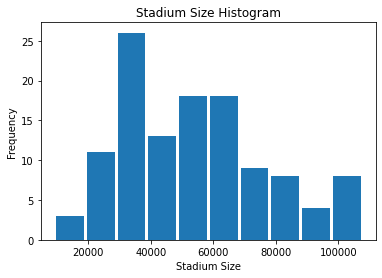

OU Stadium Size:  77    82112
Name: StadSize, dtype: int64
53059.22881355932
23598.80054600988


In [7]:
plt.hist(football['StadSize'], density=False, stacked=False, rwidth=.9)
plt.title("Stadium Size Histogram")
plt.xlabel('Stadium Size')
plt.ylabel('Frequency')
plt.show()
print("OU Stadium Size: ",OU['StadSize'])
print(np.mean(football['StadSize']))
print(np.std(football['StadSize']))

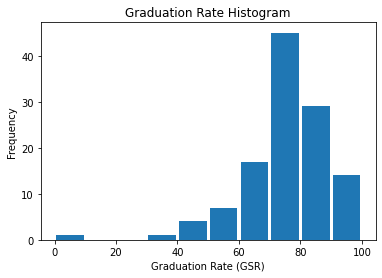

OU Graduation Rate:  77    74
Name: Graduation Rate (GSR), dtype: int64
74.64406779661017
14.185529403937661


In [8]:
plt.hist(football['Graduation Rate (GSR)'], density=False, stacked=False, rwidth=.9)
plt.title("Graduation Rate Histogram")
plt.xlabel('Graduation Rate (GSR)')
plt.ylabel('Frequency')
plt.show()
print("OU Graduation Rate: ", OU['Graduation Rate (GSR)'])
print(np.mean(football['Graduation Rate (GSR)']))
print(np.std(football['Graduation Rate (GSR)']))

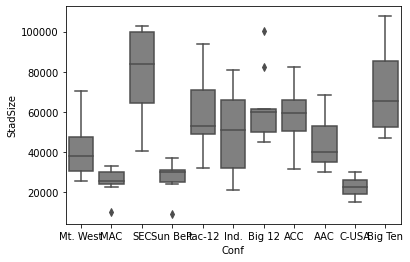

In [9]:
sns.boxplot(x="Conf", y="StadSize", data=football, color = "gray");
plt.show()

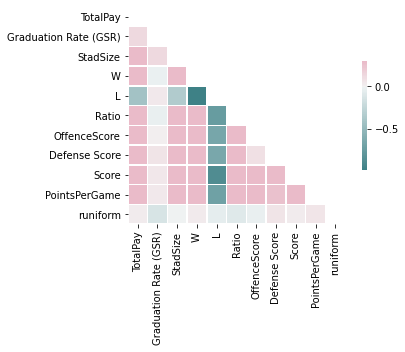

In [40]:
corr = football.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 0, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
sns.stripplot(x="StadSize", y="TotalPay", data=football)
plt.show()

sns.stripplot(x="Score", y="TotalPay", data=football)
plt.show()

sns.stripplot(x="W", y="TotalPay", data=football)
plt.show()

Looks like Stadium Size and Score both impact the overall coach salary. 

In [ ]:
my_model_simple = str('TotalPay ~ Conf')
train_model_fit = smf.ols(my_model_simple, data = football).fit()
print(train_model_fit.summary())

np.random.seed(1234)
football['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(football))
football_train = football[football['runiform'] >= 0.33]
football_test = football[football['runiform'] < 0.33]
# check training data frame
print('\nfootball_train data frame (rows, columns): ',football_train.shape)
print(football_train.head())
# check test data frame
print('\nfootball_test data frame (rows, columns): ',football_test.shape)
print(football_test.head())

In [ ]:
my_model_simple = str('TotalPay ~ Conf')
train_model_fit = smf.ols(my_model_simple, data = football_train).fit()
print(train_model_fit.summary())

In [53]:
my_model = str('TotalPay ~ Conf + StadSize + Ratio')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = football_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
football_train['predict_TotalPay'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
football_test['predict_TotalPay'] = train_model_fit.predict(football_test)

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     28.17
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           8.29e-20
Time:                        03:52:34   Log-Likelihood:                -1064.4
No. Observations:                  71   AIC:                             2155.
Df Residuals:                      58   BIC:                             2184.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.921e+05   4.53e+05  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [16]:
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(football_test['TotalPay'].corr(football_test['TotalPay']),2),3))

my_model_fit = smf.ols(my_model, data = football).fit()

print('\nEstimated Effect of Big 12 Conference on Total Pay: ',\
    round(my_model_fit.params[2],0))
R_salary = np.mean(football['TotalPay'])+round(my_model_fit.params[2],0)
print('\nGiven that OU is currently a member of the Big 12, recommended coach salary is: ',R_salary)
print('\nEstimated Effect of Big 12 Conference on Total Pay: ',\
    round(my_model_fit.params[9],0))
R_salary_SEC = np.mean(football['TotalPay'])+round(my_model_fit.params[9],0)
print('\nIf OU moves to the SEC, recommended coach salary is: ',R_salary_SEC)


Proportion of Test Set Variance Accounted for:  1.0

Estimated Effect of Big 12 Conference on Total Pay:  1692223.0

Given that OU is currently a member of the Big 12, recommended coach salary is:  4249661.088495575

Estimated Effect of Big 12 Conference on Total Pay:  1900160.0

If OU moves to the SEC, recommended coach salary is:  4457598.088495575


These recommended salary amounts are figured without excluding any school data. In this analysis, the conference that a school belongs to is the single biggest contributor to overall salary size.

               School     Conf           Coach  ...  Score  PointsPerGame  runiform
2             Alabama      SEC      Nick Saban  ...  25.62          90.38  0.437728
4             Arizona   Pac-12    Kevin Sumlin  ...  -4.63          74.42  0.779976
5       Arizona State   Pac-12    Herm Edwards  ...  -2.60          79.22  0.272593
6            Arkansas      SEC     Chad Morris  ...   4.35          80.66  0.276464
9              Auburn      SEC     Gus Malzahn  ...  11.97          81.80  0.875933
..                ...      ...             ...  ...    ...            ...       ...
111       Wake Forest      ACC    Dave Clawson  ...   0.73          69.97  0.193619
112        Washington   Pac-12  Chris Petersen  ...  19.98          88.28  0.457812
113  Washington State   Pac-12      Mike Leach  ...   9.03          84.22  0.920403
114     West Virginia   Big 12  Dana Holgorsen  ...   9.57          78.75  0.879069
116         Wisconsin  Big Ten     Paul Chryst  ...  15.30          78.74  0

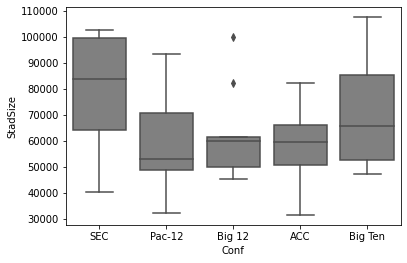

<function print>

In [24]:
# Lets filter the data to the biggest 5 conferences and see what the salary recommendations are.
options = ["ACC","Big Ten", "Big 12","Pac-12", "SEC"]
football_new = football[football['Conf'].isin(options)]
print(football_new)

sns.boxplot(x="Conf", y="StadSize", data=football_new, color = "gray");
plt.show()

print

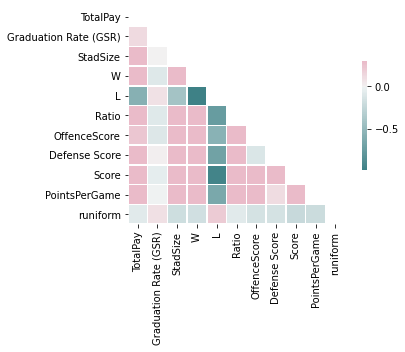

In [39]:
corr2 = football_new.corr()

mask = np.zeros_like(corr2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 0, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
my_model_simple = str('TotalPay ~ StadSize')
train_model_fit = smf.ols(my_model_simple, data = football_new).fit()
print(train_model_fit.summary())

np.random.seed(1234)
football_new['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(football_new))
football_new_train = football_new[football_new['runiform'] >= 0.33]
football_new_test = football_new[football_new['runiform'] < 0.33]
# check training data frame
print('\nfootball_new_train data frame (rows, columns): ',football_new_train.shape)
print(football_new_train.head())
# check test data frame
print('\nfootball_new_test data frame (rows, columns): ',football_new_test.shape)
print(football_new_test.head())

Stadium Size appears to be a large contributing factor to total pay. 

In [42]:
my_model_simple = str('TotalPay ~ StadSize')
train_model_fit = smf.ols(my_model_simple, data = football_new_train).fit()
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     34.76
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           4.79e-07
Time:                        03:44:18   Log-Likelihood:                -706.29
No. Observations:                  46   AIC:                             1417.
Df Residuals:                      44   BIC:                             1420.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.101e+05   6.17e+05      0.503      0.6

In [57]:
my_model = str('TotalPay ~ StadSize + Score + Conf + W')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = football_new_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
football_new_train['predict_TotalPay'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
football_new_test['predict_TotalPay'] = train_model_fit.predict(football_new_test)

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     8.101
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           6.68e-06
Time:                        03:54:16   Log-Likelihood:                -668.41
No. Observations:                  44   AIC:                             1353.
Df Residuals:                      36   BIC:                             1367.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.748e+05   1.31e+06     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [66]:
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(football_new_test['TotalPay'].corr(football_new_test['TotalPay']),2),3))

my_model_fit = smf.ols(my_model, data = football_new).fit()

print('\nEstimated Effect of stadium size on total pay is ',\
    round(my_model_fit.params[5],0), " dollars per additional seat")
R_salary = np.mean(football_new['TotalPay'])+(round(my_model_fit.params[5],0)*(82112-np.mean(Big12['StadSize'])))
print('\nGiven that OU is currently a member of the Big 12, recommended coach salary is: ',R_salary)
R_salary_SEC = np.mean(football_new['TotalPay'])+(round(my_model_fit.params[5],0)*(82112-np.mean(SEC['StadSize'])))
print('\nIf OU moves to the SEC, recommended coach salary is: ',R_salary_SEC)


Proportion of Test Set Variance Accounted for:  1.0

Estimated Effect of stadium size on total pay is  41.0  dollars per additional seat

Given that OU is currently a member of the Big 12, recommended coach salary is:  4700896.3

If OU moves to the SEC, recommended coach salary is:  3945845.5714285714
80418.07142857143


These recommended salaries are based only on data from the top five football conferences. In theory, this ensures similar program sizes, school reputations, and available budgets for salaries. In this case, the school stadium size is the largest contributing factor to overall coach salary. The SEC conference is larger than the Big 12, so the decrease in coach salary does make intuitive since. Big fish moving to a bigger pond. 